<a href="https://colab.research.google.com/github/Sangyeonglee353/ai-hongong/blob/main/Chapter_08_%EC%9D%B4%EB%AF%B8%EC%A7%80%EB%A5%BC_%EC%9C%84%ED%95%9C_%EC%9D%B8%EA%B3%B5_%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ch08-2 | 합성곱 신경망을 사용한 이미지 분류

## 패션 MNIST 데이터 불러오기

In [2]:
# 1. 데이터 불러오기
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) =\
  keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

4422102/4422102 [==============================] - 0s 0us/step


## 합성곱 신경망 만들기

In [5]:
# 1. 합성곱 층 만들기
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28, 28, 1)))
# (28, 28, 32)

In [6]:
# 2. 풀링 층 추가
model.add(keras.layers.MaxPooling2D(2))
# (14, 14, 32)

In [8]:
# 3. 두 번째 합성곱-폴링 층 추가
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))
# (7, 7, 64)

In [9]:
# 4. 3차원 특성맵 펼치고 출력하기
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [10]:
# 5. 모델 구조 확인
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 7, 7, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 3, 3, 64)         

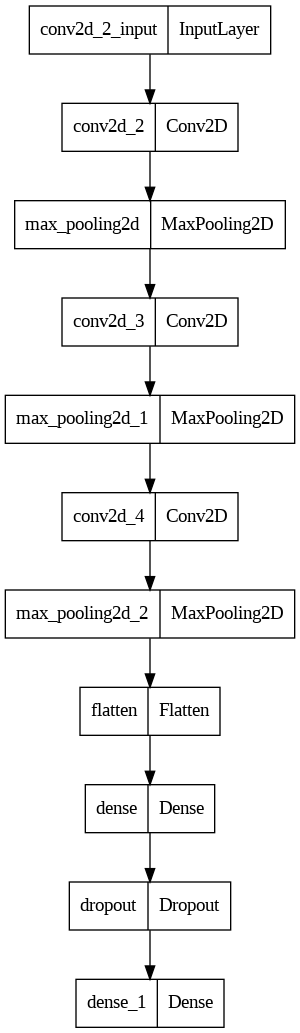

In [11]:
# 6. 그림으로 확인
keras.utils.plot_model(model)

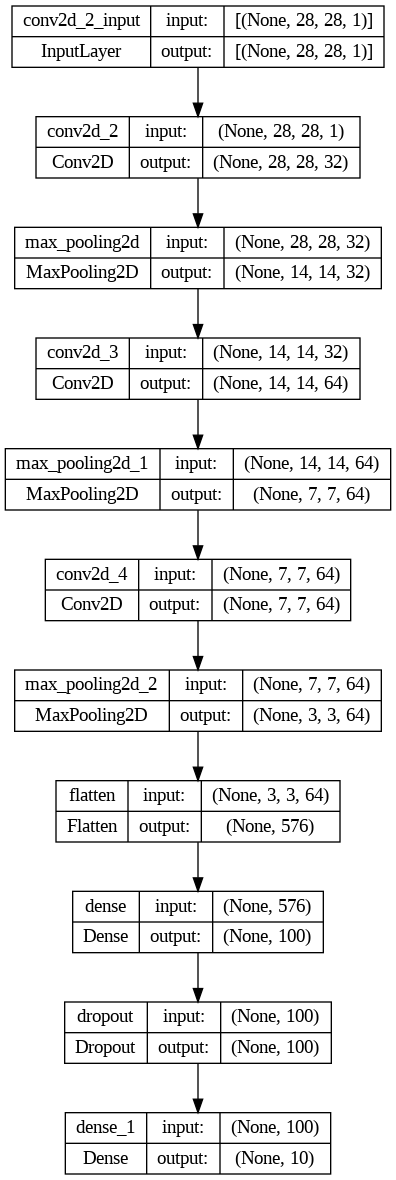

In [12]:
# 7. 그림으로 확인하기(입출력값 포함)
keras.utils.plot_model(model, show_shapes=True)

## 모델 컴파일과 훈련

In [15]:
# 모델 컴파일과 훈련
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 87s 57ms/step - loss: 0.5825 - accuracy: 0.7909 - val_loss: 0.3637 - val_accuracy: 0.8625
Epoch 2/20
   3/1500 [..............................] - ETA: 1:06 - loss: 0.3295 - accuracy: 0.8750

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 118s 79ms/step - loss: 0.3641 - accuracy: 0.8684 - val_loss: 0.3024 - val_accuracy: 0.8862
Epoch 3/20
1500/1500 [==============================] - 94s 62ms/step - loss: 0.3121 - accuracy: 0.8867 - val_loss: 0.2741 - val_accuracy: 0.8971
Epoch 4/20
1500/1500 [==============================] - 90s 60ms/step - loss: 0.2779 - accuracy: 0.8986 - val_loss: 0.2851 - val_accuracy: 0.8938
Epoch 5/20
1500/1500 [==============================] - 92s 61ms/step - loss: 0.2533 - accuracy: 0.9079 - val_loss: 0.2481 - val_accuracy: 0.9092
Epoch 6/20
1500/1500 [==============================] - 82s 55ms/step - loss: 0.2317 - accuracy: 0.9148 - val_loss: 0.2354 - val_accuracy: 0.9130
Epoch 7/20
1500/1500 [==============================] - 81s 54ms/step - loss: 0.2125 - accuracy: 0.9226 - val_loss: 0.2358 - val_accuracy: 0.9130
Epoch 8/20
1500/1500 [==============================] - 79s 53ms/step - loss: 0.2001 - accuracy: 0.9267 - val_loss: 0.2295 - val_accur

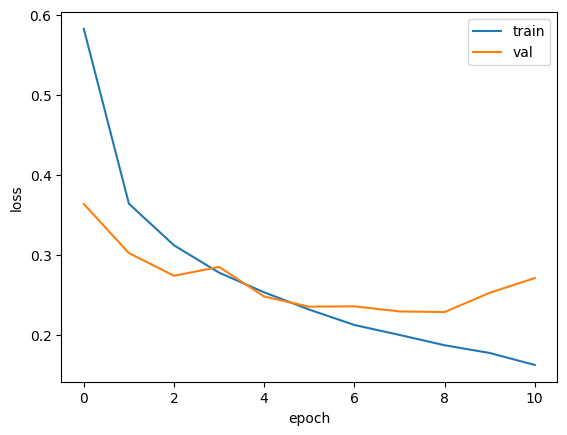

In [16]:
# 2. 결과 시각화 확인
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [17]:
# 3. 세트에 대한 성능 평가
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 9s 24ms/step - loss: 0.2287 - accuracy: 0.9149


[0.22867736220359802, 0.9149166941642761]

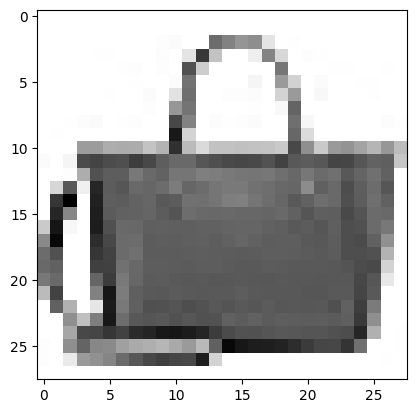

In [18]:
# 4. 첫 번째 샘플 이미지 확인
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [19]:
# 5. 10개의 클래스에 대한 예측 확률 출력
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 [==============================] - 0s 271ms/step
[[1.1050107e-12 1.9837034e-18 1.9803918e-18 1.7518414e-18 3.0666021e-17
  5.9296875e-16 4.4800140e-15 4.6893784e-14 1.0000000e+00 1.4428372e-15]]


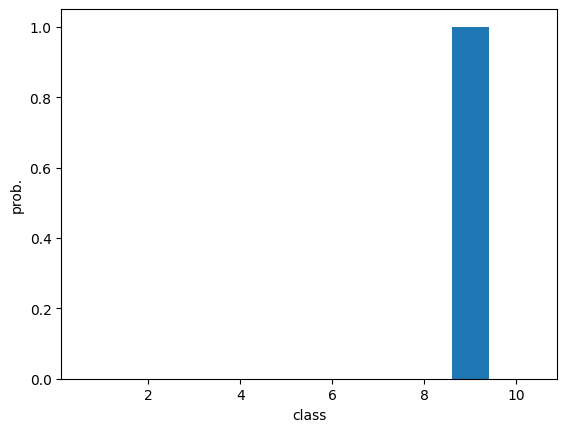

In [20]:
# 6. 막대 그래프로 확인
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [21]:
# 7. 레이블을 리스트에 저장
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [22]:
# 8. 레이블로 활용
import numpy as np
print(classes[np.argmax(preds)])

가방


In [23]:
# 9. 픽셀값의 범위를 0~1 사이로 변경 & 이미지 크기 (28, 28) => (28, 28, 1)로 변경
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [24]:
# 10. 테스트 세트에 대한 성능 측정
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 8s 23ms/step - loss: 0.2475 - accuracy: 0.9115


[0.24752169847488403, 0.9114999771118164]

In [25]:
# 전체 소스 코드: https://bit.ly/hg-08-2